## Sales Analysis

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading updated Dataset 

In [60]:
columnsNames = ['OrderId','Product','QuantityOrdered','PriceEach','OrderDate','PurchaseAddress']
dataset = pd.read_csv(r'D:\Learning\EstudosDataScience\Projetos\20210821 Sales Analysis\3 - Dados de Upload\20210821\dataset.csv', header=0, names=columnsNames,dtype={'OrderId':object})
dataset.head()

,OrderId,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Question 1: What was the best month for sales? How much was earned that month?

In [62]:
# Creating Month column
dataset['OrderDate'] = pd.to_datetime(dataset['OrderDate'])
dataset['month'] = dataset.OrderDate.dt.month

In [63]:
# Adding Column for Profit
dataset['Profit'] = dataset.PriceEach * dataset.QuantityOrdered
dataset.head()

,OrderId,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,month,Profit
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [64]:
# Grouping Data for month
groupMonth = dataset.groupby(dataset.month).sum(numeric_only=True)
groupMonth

,QuantityOrdered,PriceEach,Profit
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


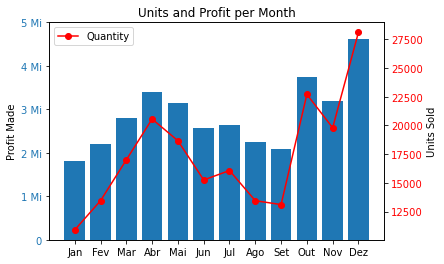

In [82]:
fig, ax1 = plt.subplots()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
plt.title('Units and Profit per Month')
plt.ylabel('Profit Made')
ax1.bar(months,groupMonth.Profit, label='Profit')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.ticklabel_format(style='plain', axis='y')
plt.yticks([0,1000000,2000000,3000000,4000000,5000000],['0','1 Mi','2 Mi','3 Mi','4 Mi','5 Mi'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Units Sold')
ax2.plot(months,groupMonth.QuantityOrdered,label='Quantity',ls='-',marker='o',c='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper left')
plt.savefig(r'D:\Learning\EstudosDataScience\Projetos\20210821 Sales Analysis\5 - Insights\Sales_Per_Month.png', dpi=300, bbox_inches='tight')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### What city had the highest number of sales?

In [83]:
# Checking data 
dataset.head()

,OrderId,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,month,Profit
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


We can see that we need to work with this address string, for that we will use Regular Expression

In [84]:
# Extracting city from PurchaseAddress using regular expression https://regex101.com/
# Here we could also use: dataset.PurchaseAddress.apply(lambda x: x.split(',')[1])

dataset['City'] = dataset.PurchaseAddress.str.extract(r'(.*,\s)(.*)(,\s.*)')[1]
fullstate = dataset.PurchaseAddress.str.extract(r'(.*,\s)(.*)(,\s.*)')[2]
dataset['State'] = fullstate.str.extract(r'(,\s)(.*)(\s)(.*)')[1]
dataset.head()

,OrderId,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,month,Profit,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [85]:
# Sales per City - by profit
groupStateCity = dataset.groupby(['State','City']).sum()
groupStateCity

QuantityOrdered     PriceEach   month        Profit
State City                                                              
CA    Los Angeles              33289  5.421435e+06  208325  5.452571e+06
      San Francisco            50239  8.211462e+06  315520  8.262204e+06
GA    Atlanta                  16602  2.779908e+06  104794  2.795499e+06
MA    Boston                   22528  3.637410e+06  141112  3.661642e+06
ME    Portland                  2750  4.471893e+05   17144  4.497583e+05
NY    New York City            27932  4.635371e+06  175741  4.664317e+06
OR    Portland                 11303  1.860558e+06   70621  1.870732e+06
TX    Austin                   11153  1.809874e+06   69829  1.819582e+06
      Dallas                   16730  2.752628e+06  104620  2.767975e+06
WA    Seattle                  16553  2.733296e+06  104941  2.747755e+06

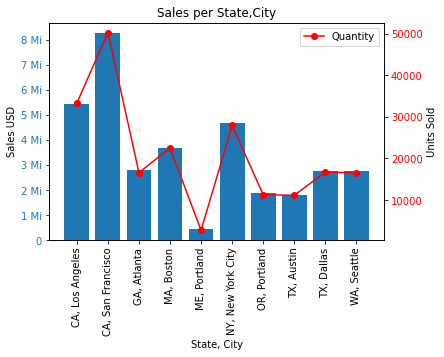

In [90]:
# Treating xticks with variable city indexes
cities = list(groupStateCity.index.values)
cities2 = []
for i,item in enumerate(cities):
    cities2.append(', '.join(cities[i]))
    
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)
plt.xlabel('State, City')
plt.ylabel('Sales USD')
plt.title('Sales per State,City')
ax1.bar(cities2,groupStateCity.Profit,label='Profit')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.ticklabel_format(style='plain', axis='y')
plt.yticks([0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000],['0','1 Mi','2 Mi','3 Mi','4 Mi','5 Mi','6 Mi','7 Mi','8 Mi'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Units Sold')
ax2.plot(cities2,groupStateCity.QuantityOrdered,label='Quantity',ls='-',marker='o',c='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper right')
plt.savefig(r'D:\Learning\EstudosDataScience\Projetos\20210821 Sales Analysis\5 - Insights\Sales_Per_City.png', dpi=300, bbox_inches='tight')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying product

In [91]:
# Checking dataset
dataset.head()

,OrderId,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,month,Profit,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [92]:
# Separating the hour column
dataset['Hour'] = dataset.OrderDate.dt.hour 
dataset.head()

,OrderId,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,month,Profit,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [93]:
groupHour = dataset.groupby('Hour').sum()
groupHour.head()

,QuantityOrdered,PriceEach,month,Profit
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01


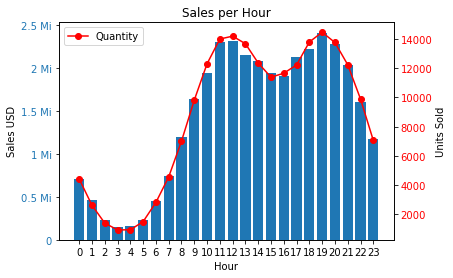

In [100]:
hours = range(0,24)

fig, ax1 = plt.subplots()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales USD')
plt.title('Sales per Hour')
ax1.bar(hours,groupHour.Profit, label='Profit')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.ticklabel_format(style='plain', axis='y')
plt.yticks([0,500000,1000000,1500000,2000000,2500000],['0','0.5 Mi','1 Mi','1.5 Mi','2 Mi','2.5 Mi'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Units Sold')
ax2.plot(hours,groupHour.QuantityOrdered,label='Quantity',ls='-',marker='o',c='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper left')
plt.savefig(r'D:\Learning\EstudosDataScience\Projetos\20210821 Sales Analysis\5 - Insights\Sales_Per_Hour.png', dpi=300, bbox_inches='tight')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### What products are most often sold together?

In [101]:
# This question is a bit rough to answer
from itertools import combinations
from collections import Counter

In [102]:
# First, creating a dataset with only values that appear as duplicates on OrderId column
dataset2 = dataset[dataset.OrderId.duplicated(keep=False)]
dataset2.head()

,OrderId,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,month,Profit,City,State,Hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11


In [103]:
# Then drop non used columns
dataset2.drop(['QuantityOrdered','PriceEach','OrderDate','PurchaseAddress','month','Profit','City','State','Hour'],axis=1)

,OrderId,Product
2,176560,Google Phone
3,176560,Wired Headphones
17,176574,Google Phone
18,176574,USB-C Charging Cable
29,176585,Bose SoundSport Headphones
...,...,...
185893,259303,AA Batteries (4-pack)
185904,259314,Wired Headphones
185905,259314,AAA Batteries (4-pack)
185941,259350,Google Phone


In [104]:
# Creating a extra column for a grouped products sold together
dataset2['Grouped'] = dataset2.groupby('OrderId').Product.transform(lambda x: ','.join(x))
dataset2.head()

<ipython-input-104-13db88dc171d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['Grouped'] = dataset2.groupby('OrderId').Product.transform(lambda x: ','.join(x))


,OrderId,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,month,Profit,City,State,Hour,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [105]:
# Now we dont need those duplicates anymore
dataset3 = dataset2[dataset2.OrderId.duplicated(keep='first')]

In [106]:
# Now we can drop Product column as well
dataset4 = dataset3.drop('Product',axis=1)

In [107]:
# Now with those libraries 
# each grouped value will be a sublist, than we will count each value inside every sublist and create a dict for it
count = Counter() # Creating a counter

for row in dataset4.Grouped:
    rowList = row.split(',') # Each Grouped row will be splitted by comma into a list
    count.update(Counter(combinations(rowList, 2)))  # This will count the most recurrent 2 items, could be 3,4,...

In [108]:
# Ordering by the most commom Counter
mostComm = count.most_common()

#exporting data
with open(r'D:\Learning\EstudosDataScience\Projetos\20210821 Sales Analysis\5 - Insights\most_commom_together.txt', 'w') as f:
    for t in mostComm:
          f.write(' '.join(str(s) for s in t) + '\n')

#### What products are sold the most and why?

In [109]:
mostSold = dataset.groupby('Product').QuantityOrdered.sum().sort_values(ascending=False).head(10)
profitMade = dataset.groupby('Product').Profit.sum().sort_values(ascending=False).head(10)

<ipython-input-132-aa463fb063fe>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(['0','1 Mi','2 Mi','3 Mi','4 Mi','5 Mi','6 Mi','7 Mi', '8 Mi'])


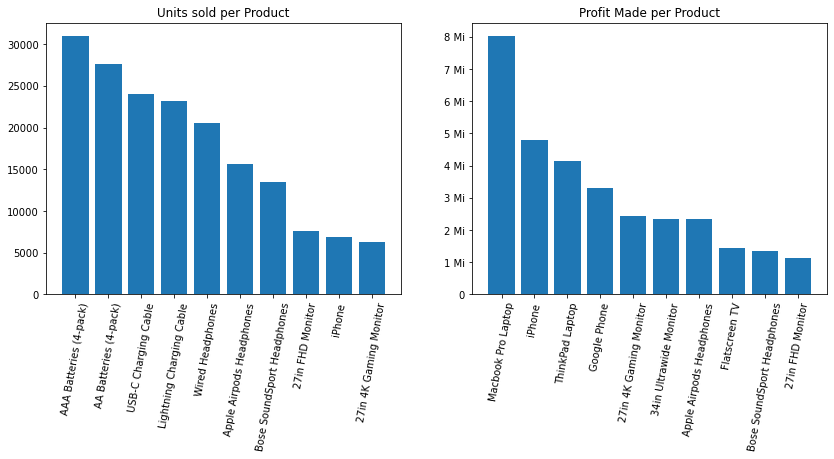

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

plt.xticks(rotation=80)
axes[0].set_title('Units sold per Product')
axes[1].set_title('Profit Made per Product')
axes[0].tick_params(labelrotation=80,axis='x')
axes[1].tick_params(labelrotation=80,axis='x')
axes[1].ticklabel_format(style='plain')
axes[1].set_yticklabels(['0','1 Mi','2 Mi','3 Mi','4 Mi','5 Mi','6 Mi','7 Mi', '8 Mi'])
axes[0].bar(mostSold.index,mostSold.values)
axes[1].bar(profitMade.index,profitMade.values)
plt.savefig(r'D:\Learning\EstudosDataScience\Projetos\20210821 Sales Analysis\5 - Insights\UnitsProfit_per_product.png', dpi=300, bbox_inches='tight')


In [156]:
mostSold_mostProfit = mostSold.index[mostSold.index.isin(profitMade.index)]
mostSold_lessProfit = mostSold.index[pd.Series(mostSold.index.isin(profitMade.index)).apply(lambda x: not(x))]

In [167]:
# Those are the most sold units while the most profitable 
with open(r'D:\Learning\EstudosDataScience\Projetos\20210821 Sales Analysis\5 - Insights\mostSold_while_mostProfitable.txt', 'w') as f:
    for t in mostSold_mostProfit.values:
          f.write(''.join(str(s) for s in t) + '\n')

mostSold_mostProfit

Index(['Apple Airpods Headphones', 'Bose SoundSport Headphones',
       '27in FHD Monitor', 'iPhone', '27in 4K Gaming Monitor'],
      dtype='object', name='Product')

In [168]:
# Here we con notice that the most sold units are not necessarily the most profitable ones
with open(r'D:\Learning\EstudosDataScience\Projetos\20210821 Sales Analysis\5 - Insights\mostSold_while_lessProfitable.txt', 'w') as f:
    for t in mostSold_lessProfit.values:
          f.write(''.join(str(s) for s in t) + '\n')
            
mostSold_lessProfit


Index(['AAA Batteries (4-pack)', 'AA Batteries (4-pack)',
       'USB-C Charging Cable', 'Lightning Charging Cable', 'Wired Headphones'],
      dtype='object', name='Product')